In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# 在jupyter中使用Matplotlib绘制的图形可以在输出单元格中直接显示，而不是在另一个窗口中弹出。

#### 第一题：使用Numpy创建一个4*3的随机数矩阵，并打印出最大最小元素

In [2]:
# 创建一个4x3的随机数矩阵
arr = np.random.rand(4, 3)

# 打印矩阵
print("随机数矩阵:\n", arr)

#打印最大最小值
print("最小值:", arr.max())
print("最大值:", arr.min())

随机数矩阵:
 [[0.49177835 0.30416613 0.3834113 ]
 [0.78814067 0.76496665 0.36292627]
 [0.59903524 0.5121036  0.73072745]
 [0.25501402 0.45793948 0.35470064]]
最小值: 0.7881406712468291
最大值: 0.2550140198291434


#### 第二题：使用Numpy创建一个6*6的矩阵，且矩阵边界全为3，里面全为1

In [3]:
a = np.ones((6, 6)) # 创建一个6*6的矩阵

# 矩阵边界全为3，里面全为1
a[0, :] = 3
a[-1, :] = 3
a[:, 0] = 3
a[:, -1] = 3

# 输出矩阵
print(a)

[[3. 3. 3. 3. 3. 3.]
 [3. 1. 1. 1. 1. 3.]
 [3. 1. 1. 1. 1. 3.]
 [3. 1. 1. 1. 1. 3.]
 [3. 1. 1. 1. 1. 3.]
 [3. 3. 3. 3. 3. 3.]]


#### 第三题：使用matplotlib简易画出y=2cos(x)+3sin(x)图像

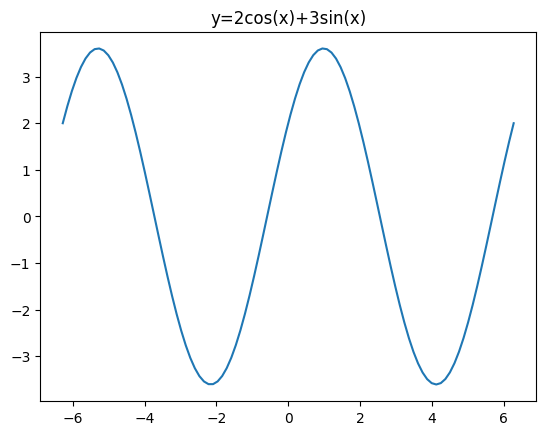

In [4]:
# 创建了一个从-2π到2π，包含100个元素的等差数列x
x = np.linspace(-2*np.pi, 2*np.pi, 100)

# 根据x计算出y的值
y = 2 * np.cos(x) + 3 * np.sin(x)

# 使用plot函数绘制出图像
plt.plot(x, y)
plt.title("y=2cos(x)+3sin(x)")
# 使用show函数显示图像
plt.show()

#### **第四题：** 使用pandas生成一个有5列的DataFrame,其中数据随机生成，列的索引使用abcde，求哪一列的和最小，返回此列的索引

In [5]:
# 使用pd.DataFrame()函数创建了一个5*5的DataFrame
# 其中数据使用np.random.rand()函数随机生成
df = pd.DataFrame(np.random.rand(5, 5), columns=list('abcde'))

# 使用df.sum()函数计算出每一列的和
# 使用idxmin()函数找到和最小的那一列的索引
min_col = df.sum().idxmin()

print(min_col)

b


In [6]:
# 返回dataframe的信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       5 non-null      float64
 1   b       5 non-null      float64
 2   c       5 non-null      float64
 3   d       5 non-null      float64
 4   e       5 non-null      float64
dtypes: float64(5)
memory usage: 328.0 bytes


In [7]:
# 每一列的和
df.sum()

a    2.824746
b    1.643857
c    3.184833
d    1.752297
e    3.230865
dtype: float64

#### 第五题：调用mnist数据，统计每种类型图片（包含训练数据和测试数据）的数量，画出数量最多的那种数字的五个不同图像

In [8]:
from tensorflow.keras.datasets import mnist

In [9]:
# 加载MNIST数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 计算每种数字的数量
unique, counts = np.unique(y_train, return_counts=True)
train_counts = dict(zip(unique, counts))
unique, counts = np.unique(y_test, return_counts=True)
test_counts = dict(zip(unique, counts))

# 打印每种数字的数量
print('训练数据中每种数字的数量: ', train_counts)
print('测试数据中每种数字的数量: ', test_counts)

训练数据中每种数字的数量:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
测试数据中每种数字的数量:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


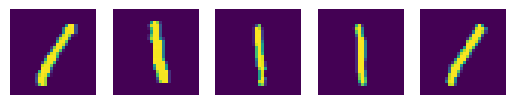

In [10]:
# 找到数量最多的数字
most_common_digit = max(train_counts, key=train_counts.get)

# 画出数量最多的数字的五个不同图像
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(x_train[y_train == most_common_digit][i])
    ax[i].axis('off')
plt.show()

#### 第六题：使用keras构建一个fashion_minist图像识别模型，有三个隐藏层，第一个隐藏层有60个节点，第二个隐藏层有40个节点，第三个隐藏层有20个节点，第一个隐藏层的激活函数是relu，后两个激活函数使用tanh，采用50%的dropout，对模型进行训练（epoch为20），显示评价结果（准确率和精确率），并将测试数据的预测结果输出到一个CSV文件。

In [11]:
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [12]:
# 加载数据
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 数据预处理
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 将类别向量转换为二进制类矩阵
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [13]:
# 构建模型
model = Sequential()
model.add(Dense(60, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(40, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 编译模型
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# 训练模型
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 4s 3ms/step - loss: 1.2831 - accuracy: 0.5393 - val_loss: 0.6414 - val_accuracy: 0.7696
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.8466 - accuracy: 0.7032 - val_loss: 0.5510 - val_accuracy: 0.8102
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.7513 - accuracy: 0.7458 - val_loss: 0.5228 - val_accuracy: 0.8204
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.7097 - accuracy: 0.7668 - val_loss: 0.4973 - val_accuracy: 0.8308
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6887 - accuracy: 0.7763 - val_loss: 0.4971 - val_accuracy: 0.8343
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6695 - accuracy: 0.7848 - val_loss: 0.4849 - val_accuracy: 0.8389
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6594 - accuracy: 0.7870 - val_loss: 0.4772 - val_accuracy: 0.8423
Epoch 

In [14]:
# 评估模型
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4594443738460541
Test accuracy: 0.8497999906539917


In [15]:
# 输出预测结果到CSV文件
import pandas as pd
predictions = model.predict(x_test)
predictions_df = pd.DataFrame(predictions)
predictions_df.to_csv('predictions.csv', index=False)

#### 第七题：实现一个简单的房屋价格预测程序，文件price.csv为某房屋中介销售信息，其中第1列为房屋面积，第2列为房屋价格，请编写Python程序完成下面功能。

##### (1) 使用pandas读取price.csv文件，并用matplotlib画出area和price的散点图，画出关于area的直方图。

In [16]:
# 读取CSV文件
df = pd.read_csv('price.csv')
area = df['Area']
price = df['Price']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     39 non-null     int64  
 1   Price    39 non-null     float64
 2   w=3,b=9  0 non-null      float64
 3   w=4,b=8  0 non-null      float64
 4   w=3,b=6  0 non-null      float64
 5   w=2,b=5  0 non-null      float64
 6   w=6,b=7  0 non-null      float64
dtypes: float64(6), int64(1)
memory usage: 2.3 KB


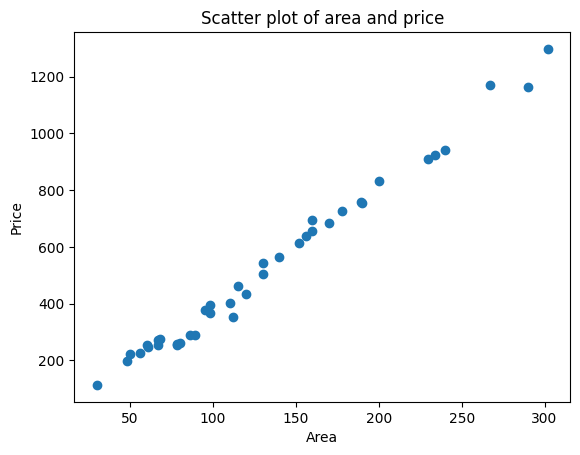

In [17]:
# 绘制散点图
# 使用matplotlib的scatter函数绘制了一个散点图

plt.scatter(df['Area'], df['Price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter plot of area and price')
plt.show()

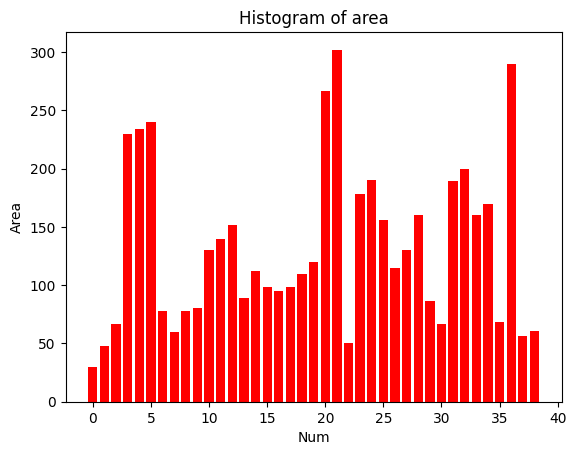

In [18]:
# 绘制直方图
# 使用matplotlib的bar函数绘制了一个直方图，显示了’Area’列的数据分布
# bins=10将数据分成10个区间

areas = df['Area']

plt.bar(range(len(areas)),areas,color = "red")
plt.xlabel('Num')
plt.ylabel('Area')
plt.title('Histogram of area')
plt.show()

（2）利用线性方程计算房屋预测价格。

In [19]:
params = [(3, 9), (4, 8), (3, 6), (2, 5), (6, 7)]
for i, (w, b) in enumerate(params):
    df[f'predict_{i+1}'] = w * area + b

（3）计算预测房价和真实房价的均方根误差（RMSE）
利用文件第3至7列的值与第2列的值，分别计算在不同参数下预测房价与真实房价的均方根误差（RMSE），其中均方根误差可用下面函数计算。$$RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(Price_{i}-Predict_{i})^2}$$

In [20]:
# 计算 RMSE
for i in range(1, 6):
    predict = df[f'predict_{i}']
    rmse = np.sqrt(np.mean((price - predict) ** 2))
    print(f'RMSE for predict_{i}: {rmse}')

RMSE for predict_1: 151.93139055474165
RMSE for predict_2: 39.684509023172474
RMSE for predict_3: 154.30671670576373
RMSE for predict_4: 302.90973310584855
RMSE for predict_5: 304.918347624325


（4）假定有一个代售房屋面积为130平米，利用均方根误差最小那组参数w和b，预测这套代售房屋的价格。

In [21]:
# 预测房屋价格
min_rmse_index = np.argmin([np.sqrt(np.mean((price - df[f'predict_{i}']) ** 2)) for i in range(1, 6)]) + 1
w, b = params[min_rmse_index - 1]
predict_price = w * 130 + b
print(f'Predicted price for 130 square meters: {predict_price}')

Predicted price for 130 square meters: 528
